# Grid Search e Tunning de Hyperparâmetros 

Neste notebook iremos estudar algumas técnicas para otimização de hyperparâmetros e validações cruzadas.

Todo algoritmo possui alguns parâmetros passívels de ajuste. Estes são os hyperparâmetros dos algoritmos, e seu tunning pode gerar consequência muito favoráveis às métricas, por isso deve-se ter uma noção de como ajustá-los de modo à garantir melhor performance.


In [1]:
# Grid Search

#Importando as libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]]
y = dataset.iloc[:, 4]

In [3]:
X.head()

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0


In [4]:
# Dividindo o dataset em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Usando Kernel SVM para classificação SEM tunar hyperparâmetros
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


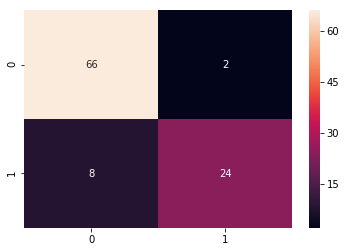

Acurácia Treino: 0.8233333333333334
Acurácia Teste: 0.9


In [7]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
acc_train = accuracy_score(y_train, classifier.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()
print('Acurácia Treino: {}'.format(acc_train))
print('Acurácia Teste: {}'.format(acc_test))

Iremos utilizar um método chamado Grid Search, em português, Busca em Grade. Este método funciona da seguinte maneira: cria-se uma grade com hyperparâmetros que serão testados no algoritmo, um a um, e todas as suas combinações. Utiliza-se uma métrica para validação, e a melhor combinação de parâmetros (de acordo com a métrica) é armazenada.

In [8]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0, 0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.8, 1, 'auto']}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           #cv = 5,
                           n_jobs = 2)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [9]:
print(best_accuracy)
print(best_parameters)

0.9166666666666666
{'C': 10, 'kernel': 'rbf', 'gamma': 0.5}


## Testando o SVC com os novos parâmetros

In [10]:
classifier = SVC(**best_parameters, random_state = 42)
classifier.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

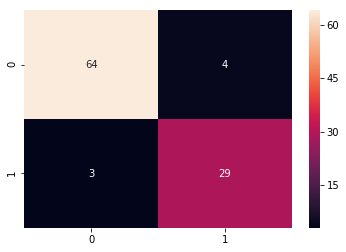

Acurácia Treino: 0.9133333333333333
Acurácia Teste: 0.93


In [11]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc_train = accuracy_score(y_train, classifier.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()
print('Acurácia Treino: {}'.format(acc_train))
print('Acurácia Teste: {}'.format(acc_test))

Assim, notamos que houve uma melhoria no processo de tunning dos hyperparâmetros. Seja criativo! Explore os parâmetros dos seus algoritmos.